In [32]:
# Comment Line 

import math
import numpy as np
import matplotlib.pyplot as plt
import scipy

# First we need to define the lattice length
# next multiply by the a constant to convert to angstrom
# Nums is the number of atoms
alat = 29.00
alat_ang = alat*0.529
nums = list(range(257))
n = 0

newfilename = 'sep23_1_atom_displacement_all'

######
# READ IN FILE , USE SPLIT TO SEPERATE OUT ALL VALUES
######

with open("sep23.1_first_bfgs_structure", "rt") as fin:
    with open("atom_pos_temp", "wt") as fout: 
        for line in fin: 
            fout.write((line.replace('Pt', '1')).replace('Ni','2').replace('P','3'))

    
with open('atom_pos_temp') as f:
    lines = f.read().split()    
    
######
# Use float to convert to float numbers
######

xpos = []
ypos = []
zpos = []
atom = []



n = 1
while n < 1024:
    atom.append(lines[n-1])
    xpos.append(float(lines[n]))
    ypos.append(float(lines[n+1]))
    zpos.append(float(lines[n+2]))
    n += 4

######
# Now multiply out atom positions
######


n = 0 
while n < 256:
    xpos[n] = xpos[n]*alat_ang
    ypos[n] = ypos[n]*alat_ang
    zpos[n] = zpos[n]*alat_ang
    n += 1

######
# Load in second structure
######


######
# READ IN FILE , USE SPLIT TO SEPERATE OUT ALL VALUES
######

# Open file, proceed to write out a new file where atom names are replaced so that Lammps can read it

with open("sep23.1_final_structure", "rt") as fin:
    with open("atom_pos_temp", "wt") as fout: 
        for line in fin: 
            fout.write((line.replace('Pt', '1')).replace('Ni','2').replace('P','3'))

    
with open('atom_pos_temp') as f:
    alines = f.read().split()

######
# Use float to convert to float numbers
######

axpos = []
aypos = []
azpos = []
aatom = []
xfine = []
yfine = []
zfine = []

n = 1
while n < 1024:
    aatom.append(alines[n-1])
    axpos.append(float(alines[n]))
    aypos.append(float(alines[n+1]))
    azpos.append(float(alines[n+2]))
    n += 4

######
# Now multiply out atom positions
######

# We will multiply out second and final structure by the crystal vector


n = 0 
while n < 256:
    axpos[n] = axpos[n]*alat_ang
    aypos[n] = aypos[n]*alat_ang
    azpos[n] = azpos[n]*alat_ang
    n += 1

    
######
# Now we can manipulate to find out the vectors between initial and final positions
# We can also find the disance between the initial and final positions
######
distance = []
n = 0 
while n < 256:
    xdis = (axpos[n]-xpos[n])**2
    ydis = (aypos[n]-ypos[n])**2
    zdis = (azpos[n]-zpos[n])**2
    distance.append(np.sqrt(xdis+ydis+zdis))
    n += 1

    
######
# Prepare Lammps File
######

text = []

n = 0
while n < 256:
    text.append((str(nums[1+n])+' '+str(atom[n])+' '+str(xpos[n])+ ' '+str(ypos[n])+ ' '+str(zpos[n]))+ ' '+str(distance[n]))
    n += 1  
    
#####
# Top formatting
#####  

file = open(newfilename, "w")
# First 3 write lines are to show size of simulation box
file.write('ITEM: TIMESTEP')
file.write('\n'+'0')
file.write('\n'+'ITEM: NUMBER OF ATOMS')
file.write('\n'+'256')
file.write('\n'+'ITEM: BOX BOUNDS pp pp pp')
file.write('\n'+'0'+' '+str(alat_ang))
file.write('\n'+'0'+' '+str(alat_ang))
file.write('\n'+'0'+' '+str(alat_ang))
file.write('\n'+'ITEM: ATOMS id type x y z distance \n')
# We are going to print out the final structure with an additional column for distance moved

#####
# Write out text to the end of file
#####

#with open(newfilename, 'w') as f:
for row in text:
    file.write("%s\n" % str(row))

# Write Second structure

text = []
n = 0
while n < 256:
    text.append((str(nums[1+n])+' '+str(aatom[n])+' '+str(axpos[n])+ ' '+str(aypos[n])+ ' '+str(azpos[n]))+ ' '+str(distance[n]))
    n += 1  
    
#####
# Top formatting
#####  

#file = open(newfilename, "w")
# First 3 write lines are to show size of simulation box
file.write('ITEM: TIMESTEP')
file.write('\n'+'1')
file.write('\n'+'ITEM: NUMBER OF ATOMS')
file.write('\n'+'256')
file.write('\n'+'ITEM: BOX BOUNDS pp pp pp')
file.write('\n'+'0'+' '+str(alat_ang))
file.write('\n'+'0'+' '+str(alat_ang))
file.write('\n'+'0'+' '+str(alat_ang))
file.write('\n'+'ITEM: ATOMS id type x y z distance \n')
# We are going to print out the final structure with an additional column for distance moved

#####
# Write out text to the end of file
#####


for row in text:
    file.write("%s\n" % str(row))
        
file.close()

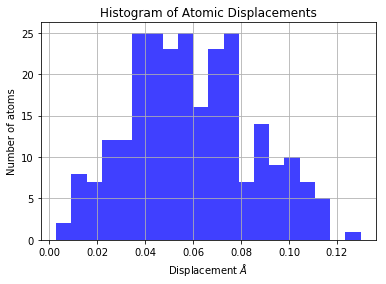

In [31]:
######
# Now we will do a histogram of distances
######

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

# the histogram of the data
n, bins, patches = plt.hist(distance, 20, facecolor='blue', alpha=0.75)

plt.xlabel('Displacement $\AA$')
plt.ylabel('Number of atoms')
plt.title('Histogram of Atomic Displacements')
#plt.axis([40, 160, 0, 0.03])
plt.savefig('sep23_1_histogram_displacement.svg')
plt.grid(True)

plt.show()

In [11]:
#### Calculation of distances with periodic images 
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy

# lattice lengths a for x, b for y, c for z
a = 15.341
b = 15.341
c = 15.341

cutoff = 2.5


# Now calculate distance doing loop
# since cell is 3-D there are 9 periodic cells around the box which means that per atom there are 10 distance calculations done
# num will be number of atoms * 10
# Need two loops 1 loop is for each atom, the second loop 

atom_num = 256
dist = []
 

# We can calculate new x2, y2 and z2 values 
# Now make a list of all possible combinations
i = []
j = []
k = []

indicies = [0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,1,0,1,1,1,1,1]
#all negative indicies
indicies.extend([-1,0,0,0,-1,0,0,0,-1,-1,-1,0,-1,0,-1,0,-1,-1,-1,-1,-1])
# now we need mixed indicies 
indicies.extend([-1,-1,1,-1,1,-1,1,-1,-1])
indicies.extend([-1,1,1,1,-1,1,1,1,-1])
indicies.extend([0,-1,1,0,1,-1,-1,0,1,-1,1,0])
   
n = 0  
while n < 75:
    # print(str(indicies[n])+' '+str(indicies[n+1])+' '+str(indicies[n+2]))
    i.append(indicies[n])
    j.append(indicies[n+1])
    k.append(indicies[n+2])
    n += 3
    
# Now do distance calculation changing x2, y2 and z2 based on i, j and k indicies 
# We need multiple loops to execute the distance calculation
# outermost loop is to range over atoms r 
# next loop over atoms m
# final loop is to calculate atom m + images
m = 0
r = 0
x = 0
cluster = []
averages = []
# Initially we had set up to avoid double counting, however double counting is actually necesasry 

while r <= (atom_num+3):
    m = 0
    while (m+1) <= (atom_num-1):
        n = 0
        while n < (25):
                x1 = axpos[r]
                y1 = aypos[r]
                z1 = azpos[r]
                x2 = axpos[m+1]+i[n]*a
                y2 = aypos[m+1]+j[n]*b
                z2 = azpos[m+1]+k[n]*c
                dist_image = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
                if dist_image < cutoff and r != m+1:
                    print('Distance is less then cutoff')
                    print(dist_image)
                    #print off indicies for the PBE cells and Atom Index
                    print('Atom Index A:',r,'Atom Index B:',(m+1))
                    print(str(i[n])+ ' '+str(j[n])+ ' '+ str(k[n]))
                    averages.append(distance[m+1])
                    print('\n')                
                n += 1
        m += 1
    if len(averages) != 0:
        #print('Cluster Found in Cutoff! For Atom:', r+1)
        cluster.append(np.average(averages))
        #cluster.append(r)
        averages = [] 
    else :
        cluster.append(0)
        averages = []
    r += 1
    x += 1

Distance is less then cutoff
2.3762847800945703
Atom Index A: 0 Atom Index B: 4
0 0 0


Distance is less then cutoff
2.385499654213279
Atom Index A: 1 Atom Index B: 2
0 0 0


Distance is less then cutoff
2.393796934454073
Atom Index A: 1 Atom Index B: 4
0 0 0


Distance is less then cutoff
2.385499654213279
Atom Index A: 2 Atom Index B: 1
0 0 0


Distance is less then cutoff
2.4009322567614793
Atom Index A: 2 Atom Index B: 12
0 0 0


Distance is less then cutoff
2.470641271046695
Atom Index A: 2 Atom Index B: 44
0 -1 0


Distance is less then cutoff
2.1212633234142464
Atom Index A: 2 Atom Index B: 195
-1 0 0


Distance is less then cutoff
2.4038469702080834
Atom Index A: 3 Atom Index B: 8
0 0 0


Distance is less then cutoff
2.3504729504910027
Atom Index A: 3 Atom Index B: 73
0 0 0


Distance is less then cutoff
2.393796934454073
Atom Index A: 4 Atom Index B: 1
0 0 0


Distance is less then cutoff
2.2278626361837706
Atom Index A: 4 Atom Index B: 6
0 0 0


Distance is less then cutoff
2

IndexError: list index out of range

256


In [109]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy

######
# Prepare Lammps file with Cluster Data 
######

######
# Prepare Lammps File
######

# We are going to print out the final structure with an additional column for distance moved
text = []

n = 0
while n < 256:
    text.append((str(nums[1+n])+' '+str(aatom[n])+' '+str(axpos[n])+ ' '+str(aypos[n])+ ' '+str(azpos[n])+ ' '+str(distance[n])+ ' '+str(cluster[n])))
    n += 1  

#####
# Top formatting
#####  
newfilename = 'cluster_lammps'

file = open(newfilename, "w")
# First 3 write lines are to show size of simulation box
file.write('ITEM: TIMESTEP')
file.write('\n'+'0')
file.write('\n'+'ITEM: NUMBER OF ATOMS')
file.write('\n'+'256')
file.write('\n'+'ITEM: BOX BOUNDS pp pp pp')
file.write('\n'+'0'+' '+ str(alat_ang))
file.write('\n'+'0'+' '+str(alat_ang))
file.write('\n'+'0'+' '+str(alat_ang))
file.write('\n'+'ITEM: ATOMS id type x y z dist cluster \n')

#####
# Write out text to the end of file
#####

with open(newfilename, 'w') as f:
    for row in text:
        file.write("%s\n" % str(row))
        
file.close()

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy

#####
# Point Charge Calculation Example
#####

# Coulumb Constant : Units : N m^2 C^-2
c = 9.0*10**9

#####
# List of atom positions
#####

x = [1,10,2]
y = [2,8,4]
z = [1,7,5]

# Empty lists that will be used
# to compute x, y and z components 
xtemp  = []
ytemp  = []
ztemp  = []


xfield = []
yfield = []
zfield = []

#####
# Calculation of Electric Field
#####
m = 0
n = 0

while m < (len(x)):
    n =0
    while n < (len(x)):
        # X-Component of E field first
        if n != m:
            print(m,n)
            xtemp.append(c/(x[n]-x[m])**2)
            ytemp.append(c/(y[n]-y[m])**2)
            ztemp.append(c/(z[n]-z[m])**2)
        n += 1
    xfield.append(np.sum(xtemp))
    xtemp = []
    yfield.append(np.sum(ytemp))
    ytemp = []
    zfield.append(np.sum(ztemp))
    ztemp = []
    m += 1
    


0 1
0 2
1 0
1 2
2 0
2 1
[9111111111.11111, 251736111.1111111, 9140625000.0]
[2500000000.0, 812500000.0, 2812500000.0]
[812500000.0, 2500000000.0, 2812500000.0]


In [ ]:
#### Calculation of distances with periodic images 
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy

# lattice lengths a for x, b for y, c for z
a = 15.341
b = 15.341
c = 15.341

cutoff = 5.0


# Now calculate distance doing loop
# since cell is 3-D there are 9 periodic cells around the box which means that per atom there are 10 distance calculations done
# num will be number of atoms * 10
# Need two loops 1 loop is for each atom, the second loop 

atom_num = 256
dist = []

# Coulumb Constant : Units : N m^2 C^-2
c = 9.0*10**9

# Empty lists that will be used
# to compute x, y and z components 
xtemp  = []
ytemp  = []
ztemp  = []


xfield = []
yfield = []
zfield = []

# We can calculate new x2, y2 and z2 values 
# Now make a list of all possible combinations
i = []
j = []
k = []

indicies = [0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,1,0,1,1,1,1,1]
#all negative indicies
indicies.extend([-1,0,0,0,-1,0,0,0,-1,-1,-1,0,-1,0,-1,0,-1,-1,-1,-1,-1])
# now we need mixed indicies 
indicies.extend([-1,-1,1,-1,1,-1,1,-1,-1])
indicies.extend([-1,1,1,1,-1,1,1,1,-1])
indicies.extend([0,-1,1,0,1,-1,-1,0,1,-1,1,0])
   
n = 0  
while n < 75:
    # print(str(indicies[n])+' '+str(indicies[n+1])+' '+str(indicies[n+2]))
    i.append(indicies[n])
    j.append(indicies[n+1])
    k.append(indicies[n+2])
    n += 3

    
    
# Now do distance calculation changing x2, y2 and z2 based on i, j and k indicies 
# We need multiple loops to execute the distance calculation
# outermost loop is to range over atoms r 
# next loop over atoms m
# final loop is to calculate atom m + images
m = 0
r = 0
x = 0
cluster = []
averages = []
# Initially we had set up to avoid double counting, however double counting is actually necesasry 

while r <= (atom_num+3):
    m = 0
    while (m+1) <= (atom_num-1):
        n = 0
        while n < (25):
                x1 = axpos[r]
                y1 = aypos[r]
                z1 = azpos[r]
                x2 = axpos[m+1]+i[n]*a
                y2 = aypos[m+1]+j[n]*b
                z2 = azpos[m+1]+k[n]*c
                dist_image = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
                if dist_image < cutoff and r != m+1:
                    # now use if statements to choose which atom type
                    if 
                    print('Distance is less then cutoff')
                    print(dist_image)
                    #print off indicies for the PBE cells and Atom Index
                    print('Atom Index A:',r,'Atom Index B:',(m+1))
                    print(str(i[n])+ ' '+str(j[n])+ ' '+ str(k[n]))
                    averages.append(distance[m+1])
                    print('\n')                
                n += 1
        m += 1
    if len(averages) != 0:
        #print('Cluster Found in Cutoff! For Atom:', r+1)
        cluster.append(np.average(averages))
        #cluster.append(r)
        averages = [] 
    else :
        cluster.append(0)
        averages = []
    r += 1
    x += 1